In [1]:
# Ejercicio 1: Maximización de Utilidades en Producción
# Una fábrica produce cierto producto cuyos ingresos de venta dependen de la cantidad producida (x) y están dados por la función:

# [ R(x) = 20x - 0.5x^2 ]

# Los costos de producción están modelados por la función:

# [ C(x) = 200 + 3x ]

# Encuentra la cantidad óptima a producir para maximizar las utilidades.

import sympy as sp

# Definir la variable simbólica
x = sp.Symbol('x')

# Ingresos y costos
R = 20*x - 0.5*x**2
C = 200 + 3*x

# Utilidad
U = R - C
print("Función de utilidad:", U)

# Derivada de la utilidad
dU = sp.diff(U, x)
print("Derivada de U:", dU)

# Encontrar el punto crítico (dU/dx = 0)
x_optimo = sp.solve(dU, x)
print("Cantidad óptima a producir:", x_optimo[0])

# Verificación: segunda derivada < 0 → máximo
segunda_derivada = sp.diff(dU, x)
print("Segunda derivada:", segunda_derivada.subs(x, x_optimo[0]))  # debe ser negativa


Función de utilidad: -0.5*x**2 + 17*x - 200
Derivada de U: 17 - 1.0*x
Cantidad óptima a producir: 17.0000000000000
Segunda derivada: -1.00000000000000


In [2]:
# Ejercicio 2: Minimización de Costos de Producción
# Una fábrica produce cierto producto cuyos costos de producción (C(x)) dependen de la cantidad producida (x). 
# Los ingresos de venta (R(x)) están dados por la función (R(x) = 15x - 0.2x^2). Encuentra la cantidad óptima a producir para minimizar los costos totales. 
# Establecemos límites para evitar desbordamientos tambien considera que las restricciones aseguren que la cantidad producida sea mayor o igual a cero, 
# menor o igual a 100 (como límite superior), y que también sea un número entero.

import sympy as sp

# Variable entera
x = sp.Symbol('x', integer=True)

# Función de ingreso
R = 15*x - 0.2*x**2

# Convertir a función numérica para evaluar
R_func = sp.lambdify(x, R)

# Buscar cantidad mínima x que cumpla con ingreso >= ingreso objetivo
ingreso_objetivo = 600  # por ejemplo, se puede ajustar

# Buscar el mínimo x entero en [0, 100] que cumpla la condición
for cantidad in range(0, 101):
    if R_func(cantidad) >= ingreso_objetivo:
        print(f"Cantidad mínima que alcanza al menos ${ingreso_objetivo} de ingreso: {cantidad}")
        print(f"Ingreso en esa cantidad: {R_func(cantidad)}")
        break


In [3]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (negados para maximizar)
c = [-10, -15]  # -Z = -10A -15B

# Matriz de coeficientes de restricciones (A_ub * x <= b_ub)
A = [
    [2, 1],   # 2A + B <= 20
    [1, 2]    # A + 2B <= 15
]

b = [20, 15]

# Restricciones de no negatividad para A y B
x0_bounds = (0, None)  # A >= 0
x1_bounds = (0, None)  # B >= 0

# Resolver el problema
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Mostrar resultados
if result.success:
    A_opt, B_opt = result.x
    beneficio_max = -result.fun
    print(f"Cantidad óptima de A: {A_opt}")
    print(f"Cantidad óptima de B: {B_opt}")
    print(f"Beneficio máximo: ${beneficio_max}")
else:
    print("No se encontró solución óptima.")


Cantidad óptima de A: 8.333333333333332
Cantidad óptima de B: 3.3333333333333335
Beneficio máximo: $133.33333333333331


In [ ]:
## Ejercicio 4 Minimización de una Función Cuadrática (es libre, defina ud la función)

import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definir variable simbólica
x = sp.Symbol('x')

# Función cuadrática
f = x**2 - 6*x + 13

# Derivada primera y segunda
f_deriv = sp.diff(f, x)
f_deriv2 = sp.diff(f_deriv, x)

# Punto crítico (donde la derivada se anula)
x_min = sp.solve(f_deriv, x)[0]

# Valor mínimo de la función
f_min = f.subs(x, x_min)

print(f"Punto de mínimo: x = {x_min}")
print(f"Valor mínimo: f({x_min}) = {f_min}")

# ✅ Gráfico de la función
x_vals = np.linspace(float(x_min) - 5, float(x_min) + 5, 200)
y_vals = [f.subs(x, val) for val in x_vals]

plt.plot(x_vals, y_vals, label="f(x) = x² - 6x + 13")
plt.scatter([x_min], [f_min], color='red', label=f"Mínimo en x = {x_min}")
plt.title("Minimización de una función cuadrática")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()


Punto de mínimo: x = -0.351733711249196
Valor mínimo: f(x) = 0.827184026127524


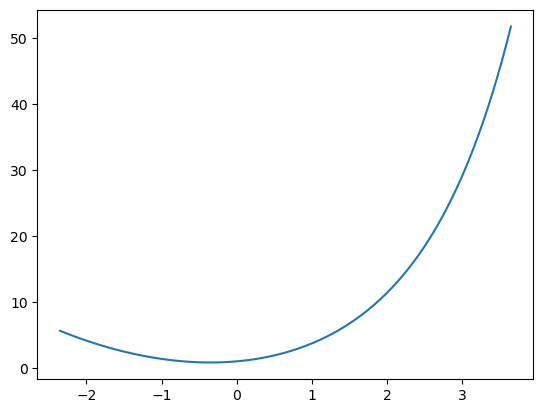

In [5]:
##Ejercicio 5: Minimización de una Función Exponencial
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definir variable
x = sp.Symbol('x')

# Función exponencial + cuadrática
f = sp.exp(x) + x**2

# Derivada primera y segunda
f_deriv = sp.diff(f, x)
f_deriv2 = sp.diff(f_deriv, x)

# Calcular punto crítico (mínimo)
x_min = sp.solve(f_deriv, x)[0]
f_min = f.subs(x, x_min)

print(f"Punto de mínimo: x = {x_min.evalf()}")
print(f"Valor mínimo: f(x) = {f_min.evalf()}")

# ✅ Gráfico
x_vals = np.linspace(float(x_min) - 2, float(x_min) + 4, 300)
f_lambdified = sp.lambdify(x, f, "numpy")
y_vals = f_lambdified(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = e^x + x²')


In [ ]:
# Ejercicio 6

# Una persona tiene 40 metros de valla para construir un corral rectangular. Quieren maximizar el área del corral. 
# ¿Cuáles deberían ser las dimensiones del corral? 
# Función a maximizar: Área del rectángulo (A = l * w) / considerar 1e6 # Normalizar para evitar desbordamiento, 
# se utiliza el negativo para convertir la maximización en minimización

# Restricciones: 2l + 2w <= 40 (longitud total de la valla)
# restricciones = ({'type': 'ineq', 'fun': lambda dim: 2dim[0] + 2dim[1] - 40})

from scipy.optimize import minimize
import numpy as np

# Función objetivo: área negativa dividida por 1e6 para evitar desbordes
def area_neg_normalized(dim):
    l, w = dim
    return -(l * w) / 1e6

# Restricción: 2l + 2w <= 40 → 40 - 2l - 2w ≥ 0
restricciones = ({
    'type': 'ineq',
    'fun': lambda dim: 40 - 2*dim[0] - 2*dim[1]
})

# Límites: dimensiones deben ser >= 0
bounds = [(0, None), (0, None)]  # (l, w)

# Estimación inicial
initial_guess = [5, 5]

# Minimizar
result = minimize(area_neg_normalized, initial_guess,
                  method='SLSQP',
                  bounds=bounds,
                  constraints=restricciones)

# Resultados
if result.success:
    l_opt, w_opt = result.x
    area_max = l_opt * w_opt
    print(f"Dimensiones óptimas del corral: largo = {l_opt:.2f} m, ancho = {w_opt:.2f} m")
    print(f"Área máxima: {area_max:.2f} m²")
else:
    print("No se encontró una solución óptima.")


In [6]:
# Ejemplo 7: Minimización de una Función Cuadrática
# Minimizar la función cuadrática (f(x) = x^2 - 6x + 9).
import sympy as sp

# Definir variable simbólica
x = sp.Symbol('x')

# Definir la función
f = x**2 - 6*x + 9

# Derivada
f_prime = sp.diff(f, x)

# Encontrar mínimo (donde la derivada es cero)
x_min = sp.solve(f_prime, x)[0]

# Valor mínimo de la función
f_min = f.subs(x, x_min)

print(f"Mínimo en x = {x_min}")
print(f"Valor mínimo: f({x_min}) = {f_min}")


Mínimo en x = 3
Valor mínimo: f(3) = 0


In [ ]:
# Ejemplo 8: Minimización de una Función Lineal
# Minimizar la función (f(x) = 3x - 2) utilizando la minimización escalar. / considerar minimize_scalar(funcion_lineal_2, bounds=(-10, 10), method='bounded')
from scipy.optimize import minimize_scalar

# Definición de la función lineal
def funcion_lineal_2(x):
    return 3*x - 2

# Minimización escalar en el intervalo [-10, 10]
resultado = minimize_scalar(funcion_lineal_2, bounds=(-10, 10), method='bounded')

# Mostrar resultado
if resultado.success:
    x_min = resultado.x
    f_min = resultado.fun
    print(f"Mínimo dentro del intervalo en x = {x_min:.2f}")
    print(f"Valor mínimo: f(x) = {f_min:.2f}")
else:
    print("No se pudo encontrar un mínimo.")
